# Aplicación de análisis del caso

Para casos con una sola columna de respuestas.
Casos disponibles:
- Luis

In [1]:
caso = "Luis"
resultados_img = f"../resultados/{caso}/"

### Guardar datos del caso por sección

In [2]:
import pandas as pd
import os 
import warnings

# Ignorar advertencias específicas de openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


print(f"Caso seleccionado: {caso}")

# PATH a las carpetas de datos
ANSWERS_DATA_PATH = f'../data/answers/{caso}'
FOLDERS_ANSWERS = os.listdir(ANSWERS_DATA_PATH)

# Dataframe para almacenar los datos
df_answers = pd.DataFrame(columns=['Respuesta', 'agno'])

# Leer archivos excel del directorio y extraer agno y seccion
for file in FOLDERS_ANSWERS:
    parts = file.split('_')  
    if len(parts) >= 3: 
        agno = parts[1]  
        print(f"Archivo: {file}, Año: {agno}")
    else:
        print(f"==== Error en extracción de año para el archivo: {file} ====")
        agno = None
    
    # Extracción de columnas
    df = pd.read_excel(f'{ANSWERS_DATA_PATH}/{file}', sheet_name='Datos')
    df = df[['Respuesta']]
    
    # Añadir columnas de agno
    df['agno'] = agno
    
    df_answers = pd.concat([df_answers, df], ignore_index=True)

# Sort, fillna y convertir columnas a string
df_answers.sort_values(by=['Respuesta', 'agno'], inplace=True)
df_answers.fillna('', inplace=True)

# Convertir las columnas especificadas a tipo string
columnas_a_convertir = [
    'Respuesta'
]

# Convertir las columnas a string
for columna in columnas_a_convertir:
    df_answers[columna] = df_answers[columna].astype(str)

# Ruta para almacenar los datos procesados
folder_path = f'processed_data/{caso}'

# Verificar si la carpeta existe, y si no, crearla
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"\nCarpeta creada: {folder_path}")
else:
    print(f"\nCarpeta ya existe: {folder_path}")

# Guardar datos como un nuevo csv en una ruta
df_answers.to_csv(f'../{folder_path}/answers_by_secc_{caso}.csv', index=False)
print(f"Datos procesados guardados en: {folder_path}/answers_by_secc_{caso}.csv")

Caso seleccionado: Luis
Archivo: Procesamient_2023_Luis.xlsx, Año: 2023

Carpeta ya existe: processed_data/Luis
Datos procesados guardados en: processed_data/Luis/answers_by_secc_Luis.csv


### Cargar conjunto de datos

In [3]:
import pandas as pd
folder_path = f'processed_data/{caso}'
df_caso = pd.read_csv(f'../{folder_path}/answers_by_secc_{caso}.csv', sep=',')

# Reducir a 20 filas
#df_caso = df_caso.head(20).sort_values(by=['agno', 'seccion', 'Grup'])

df_caso = df_caso.sort_values(by=['agno'])
df_caso = df_caso.fillna('')

# Columnas con respuestas
columnas_a_convertir = [
    'Respuesta'
]

# Convertir las columnas a string
for columna in columnas_a_convertir:
    df_caso[columna] = df_caso[columna].astype(str)

Distinción por diferenciales

In [4]:
# Agrupar por diferencial 1 y diferencial 2
# diferencial 1 conserva las columnas: 'Grup', 'Comentario - Ind1 - Diferencial 1', 'Comentario - Grup - Diferencial 1', 'Comentario - Ind2 - Diferencial 1' para df=1
"""
df_df1 = df_caso[df_caso['df'] == 1][['Grup', 
                                   'Comentario - Ind1 - Diferencial 1', 
                                   'Comentario - Grup - Diferencial 1', 
                                   'Comentario - Ind2 - Diferencial 1', 'agno', 'seccion']]

# diferencial 2 conserva las columnas: 'Grup', 'Comentario - Ind1 - Diferencial 2', 'Comentario - Grup - Diferencial 2', 'Comentario - Ind2 - Diferencial 2' para df=2
df_df2 = df_caso[df_caso['df'] == 2][['Grup', 
                                   'Comentario - Ind1 - Diferencial 2', 
                                   'Comentario - Grup - Diferencial 2', 
                                   'Comentario - Ind2 - Diferencial 2', 'agno', 'seccion']]
                                   """

"\ndf_df1 = df_caso[df_caso['df'] == 1][['Grup', \n                                   'Comentario - Ind1 - Diferencial 1', \n                                   'Comentario - Grup - Diferencial 1', \n                                   'Comentario - Ind2 - Diferencial 1', 'agno', 'seccion']]\n\n# diferencial 2 conserva las columnas: 'Grup', 'Comentario - Ind1 - Diferencial 2', 'Comentario - Grup - Diferencial 2', 'Comentario - Ind2 - Diferencial 2' para df=2\ndf_df2 = df_caso[df_caso['df'] == 2][['Grup', \n                                   'Comentario - Ind1 - Diferencial 2', \n                                   'Comentario - Grup - Diferencial 2', \n                                   'Comentario - Ind2 - Diferencial 2', 'agno', 'seccion']]\n                                   "

## Análisis Gramatical

In [12]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
# Importar las funciones del archivo software.py ubicado en la carpeta software_development
import sys
sys.path.append('../utils')
from model__1 import *

In [15]:
def aplicar_dependencias_grupal(df):
    df['Dependencias'] = df['Respuesta'].apply(lambda x: analizar_dependencias(str(x)))
    
    df.to_csv(f"../processed_data/{caso}/Tree_dependency_df.csv", index=False)
    return df

### Aplicar y guardar análisis

In [16]:
# Aplicar la función optimizada a ambos DataFrames
Tree_Dependency_d1 = aplicar_dependencias_grupal(df_caso)

### Gráficos de analisis gramatical

In [ ]:
# ============================================== GRAFICOS ============================================== #
plt.style.use('fivethirtyeight')  
plt.figure(figsize=(10, 5))
plt.boxplot([Tree_Dependency_d1['Dependencias']],
             boxprops=dict(color='black'),  
             whiskerprops=dict(color='darkblue'),  
             medianprops=dict(color='red'))  
plt.xticks([1], ['Agno 2023'])
plt.ylabel('Dependencias')
plt.title('Boxplot de las dependencias encontradas', fontsize=14, fontweight='bold')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  


plt.savefig(f"{resultados_img}/Analisis_Gramatical_boxplot_dependencias.png", bbox_inches='tight')
plt.close()  

# ============================================== GRAFICOS ============================================== #
"""
diferenciales = []
for i, df in enumerate([Tree_Dependency_d1, Tree_Dependency_d2], start=1):
    ind1_count = (df['Ind1_d'] < df['Ind2_d']).sum()
    grup_count = (df['Grup_d'] < df['Ind2_d']).sum()
    ind2_count = (df['Ind2_d'] < df['Ind1_d']).sum()
    
    diferenciales.append([f'Diferencial {i}', 'Ind1 < Ind2', ind1_count])
    diferenciales.append([f'Diferencial {i}', 'Grup < Ind2', grup_count])
    diferenciales.append([f'Diferencial {i}', 'Ind2 < Ind1', ind2_count])

df_table = pd.DataFrame(diferenciales, columns=['Diferencial', 'Comparación', 'Conteo'])

fig, ax = plt.subplots(figsize=(6, 3))  
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)  
table.set_fontsize(12)  
table.scale(1.2, 1.2)  
plt.savefig(f"{resultados_img}/Analisis_Gramatical_tabla_dependencias.png", bbox_inches='tight')
plt.close()  

# ============================================== GRAFICOS ============================================== #
diferencial_1_counts = [
    (Tree_Dependency_d1['Ind1_d'] < Tree_Dependency_d1['Ind2_d']).sum(),
    (Tree_Dependency_d1['Grup_d'] < Tree_Dependency_d1['Ind2_d']).sum(),
    (Tree_Dependency_d1['Ind2_d'] < Tree_Dependency_d1['Ind1_d']).sum()
]

diferencial_2_counts = [
    (Tree_Dependency_d2['Ind1_d'] < Tree_Dependency_d2['Ind2_d']).sum(),
    (Tree_Dependency_d2['Grup_d'] < Tree_Dependency_d2['Ind2_d']).sum(),
    (Tree_Dependency_d2['Ind2_d'] < Tree_Dependency_d2['Ind1_d']).sum()
]

bar_width = 0.35
x = np.arange(len(diferencial_1_counts))  
plt.style.use('fivethirtyeight')  
plt.figure(figsize=(10, 5))
bars1 = plt.bar(x - bar_width/2, diferencial_1_counts, width=bar_width, label='Diferencial 1', color='lightcoral', edgecolor='black')
bars2 = plt.bar(x + bar_width/2, diferencial_2_counts, width=bar_width, label='Diferencial 2', color='lightblue', edgecolor='black')
plt.ylabel('Conteo', fontsize=12)  
plt.title('Conteo de dependencias encontradas', fontsize=14, fontweight='bold') 
plt.xticks(x, ['Ind1<Ind2', 'Grup<Ind2', 'Ind2<Ind1'], fontsize=12)  
plt.legend(fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.savefig(f"{resultados_img}/Analisis_Gramatical_conteo_dependencias.png", bbox_inches='tight')
plt.close() 
"""

'\n# ============================================== GRAFICOS ============================================== #\ndiferenciales = []\nfor i, df in enumerate([Tree_Dependency_d1, Tree_Dependency_d2], start=1):\n    ind1_count = (df[\'Ind1_d\'] < df[\'Ind2_d\']).sum()\n    grup_count = (df[\'Grup_d\'] < df[\'Ind2_d\']).sum()\n    ind2_count = (df[\'Ind2_d\'] < df[\'Ind1_d\']).sum()\n    \n    diferenciales.append([f\'Diferencial {i}\', \'Ind1 < Ind2\', ind1_count])\n    diferenciales.append([f\'Diferencial {i}\', \'Grup < Ind2\', grup_count])\n    diferenciales.append([f\'Diferencial {i}\', \'Ind2 < Ind1\', ind2_count])\n\ndf_table = pd.DataFrame(diferenciales, columns=[\'Diferencial\', \'Comparación\', \'Conteo\'])\n\nfig, ax = plt.subplots(figsize=(6, 3))  \nax.axis(\'tight\')\nax.axis(\'off\')\n\ntable = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc=\'center\', loc=\'center\')\ntable.auto_set_font_size(False)  \ntable.set_fontsize(12)  \ntable.scale(1.2, 1.2)  \n

## Análisis de topicos BERT

### Procesar comentarios

In [5]:
import re
import spacy
import pandas as pd
from nltk.stem import SnowballStemmer
from bertopic import BERTopic
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [6]:
# ============================ TOKENIZADOR ============================ #
nlp = spacy.load('es_core_news_md')

# Función para cargar las stopwords
def cargar_stopwords(ruta_archivo):
    try:
        with open(ruta_archivo, 'r', encoding='utf-8') as f:
            return set(f.read().splitlines())
    except FileNotFoundError:
        print(f"El archivo {ruta_archivo} no se encontró. Usando un conjunto vacío.")
        return set()

global stop_words_custom
stop_words_custom = cargar_stopwords('../dictionaries/stopwords_es.txt')

# Clase para tokenización y stemming/lemmatización
class StemmerTokenizer:
    def __init__(self, stem=False, lemmatize=True):
        self.stem = stem
        self.lemmatize = lemmatize
        self.ps = SnowballStemmer('spanish') if stem else None
        self.stop_words_custom = cargar_stopwords('../dictionaries/stopwords_es.txt')

    def __call__(self, doc):
        # Limpiar y procesar el texto
        doc = re.sub(r'[^A-Za-záéíóúñÁÉÍÓÚÑ\s]', '', doc).lower()
        spacy_doc = nlp(doc)
        tokens = [
            self.ps.stem(token.lemma_) if self.stem and self.ps else token.lemma_
            for token in spacy_doc 
            if token.text not in self.stop_words_custom and not token.is_punct
        ]
        return tokens

# Inicializar el tokenizador
tokenizer = StemmerTokenizer(stem=False, lemmatize=True) 

In [7]:
# ===================================================== PROCESAR COMENTARIOS ===================================================== #
columnas_comentarios_dif1 = [
    'Respuesta'
]


# Concatenar los comentarios de las columnas seleccionadas de ambos DataFrames
comentarios_dif1 = df_caso[columnas_comentarios_dif1].fillna('').values.flatten()

# Unir todos los comentarios en un solo array
comentarios = pd.concat([pd.Series(comentarios_dif1)], axis=0).values.flatten()
comentarios = [str(c) for c in comentarios]
comentarios_tokenizados = [' '.join(tokenizer(c)) for c in comentarios]

### Entrenamiento

In [13]:
# ===================================================== ENTRENAMIENTO MODELO ===================================================== #
model = BERTopic(language="spanish", min_topic_size=3, nr_topics=10)
topics, probs = model.fit_transform(comentarios_tokenizados)
model.save("../saved_models/BertTopic_model_Luis")

print("Tópicos más importantes:")
for i, topic in enumerate(model.get_topic_info().head(10)['Name']):
    print(f"Tópico {i}: {topic}")

print("Largo de los tópicos:", len(model.get_topic_info()))

2024-11-17 14:18:46,850 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


Tópicos más importantes:
Tópico 0: -1_deber_proyecto_luis_responsabilidad
Tópico 1: 0_proyecto_deber_luis_empresa
Tópico 2: 1_luis_jefe_él_tomar
Tópico 3: 2_software_empresa_él_deber
Tópico 4: 3_seguridad_título_honestidad_luis
Tópico 5: 4_luis_deber_proyecto_buscar
Tópico 6: 5_deber_proyecto_luis_dirigir
Tópico 7: 6_seguridad_deber_ético_priorizar
Tópico 8: 7_colega_unir_sobreponer_categoría
Tópico 9: 8_deber_ética_tomar_departamento
Largo de los tópicos: 10


### Predicción

In [14]:
# ===================================================== PREDICCIÓN TÓPICOS ===================================================== #
BERT_model = BERTopic.load("../saved_models/BertTopic_model_Luis")

# Extraer tópicos para cada etapa (Ind1, Grup, Ind2)
topics_ind1_dif1 = model.transform(df['Respuesta'].values.flatten())[0]

In [15]:
# Guardar los tópicos en los dataframes
BERT_df1 = df_caso.copy()

BERT_df1['BERT_topicos_ind1'] = topics_ind1_dif1
# Guardar como csv
BERT_df1.to_csv(f"../processed_data/{caso}/BERT_df1.csv", index=False)

### Graficos

In [16]:
# Función para contar tópicos en una lista de comentarios
def contar_topicos(topics):
    topic_counts = Counter(topics)
    return topic_counts

# Contar la frecuencia de tópicos en cada grupo
topic_counts_ind1_dif1 = contar_topicos(topics_ind1_dif1)

In [21]:
sns.set(style="whitegrid")

def graficar_topicos_agrupados(topic_counts_ind1):
    all_topics = set(topic_counts_ind1.keys())
    
    filtered_topics = [
        topic for topic in all_topics 
        if (topic_counts_ind1.get(topic, 0))
    ]

    top_words = []
    for topic in filtered_topics:
        try:
            top_words.append(", ".join([w[0] for w in model.get_topic(topic)[:5]]))
        except:
            top_words.append(f"Tópico {topic} no encontrado")

    freqs_ind1 = [topic_counts_ind1.get(topic, 0) for topic in filtered_topics]

    x = range(len(filtered_topics))
    print(f"Generando gráfico de Frencuencia de Tópicos por Etapa...")
    plt.figure(figsize=(14, 8))
    width = 0.2
    plt.bar([p - width for p in x], freqs_ind1, width=width, label='Ind1', color=sns.color_palette("Blues")[2])

    plt.xlabel('Tópicos (Palabras Clave)', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.title(f"Frecuencia de Tópicos por Etapa - Diferencial", fontsize=16)
    plt.xticks(ticks=x, labels=top_words, rotation=90, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(f"{resultados_img}/BERT_frec_topicos_d.png", dpi=300, bbox_inches='tight')
    plt.close()

    print("Gráfico generado exitosamente.")
    # ==== GRAFICO TOPICOS MAS COMUNES ==== #
    # Top 10 topicos mas frecuentes (considerando todas las etapas y distinguiendo por diferencial)
    total_counts = {topic: (topic_counts_ind1.get(topic, 0)) 
                for topic in filtered_topics}

    top_10_topics = sorted(total_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    top_10_topics, top_10_freqs = zip(*top_10_topics)
    bottom_20_topics = sorted(total_counts.items(), key=lambda x: x[1])[:20]
    bottom_20_topics, bottom_20_freqs = zip(*bottom_20_topics)

    top_words = []
    for topic in filtered_topics:
        try:
            top_words.append(", ".join([w[0] for w in model.get_topic(topic)[:5]]))
        except:
            top_words.append(f"Tópico {topic} no encontrado")
    
    top_10_words = [", ".join([w[0] for w in model.get_topic(topic)[0:5]]) for topic in top_10_topics]
    bottom_20_words = [", ".join([w[0] for w in model.get_topic(topic)[0:5]]) for topic in bottom_20_topics]

    print(f"Generando gráficos de tópicos más y menos comunes...")
    # Graficar los 10 tópicos más comunes
    plt.figure(figsize=(14, 8))
    sns.barplot(x=list(top_10_freqs), y=list(top_10_words), palette="Blues")
    plt.ylabel('Tópicos (Palabras Clave)', fontsize=14)
    plt.xlabel('Frecuencia', fontsize=14)
    plt.title(f"Top 10 Tópicos Más Comunes - Diferencial", fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{resultados_img}/BERT_Top10_Topicos_Mas_Comunes_d.png", dpi=300, bbox_inches='tight')
    plt.close()

    # Graficar los 20 tópicos menos comunes
    plt.figure(figsize=(14, 8))
    sns.barplot(x=list(bottom_20_freqs), y=list(bottom_20_words), palette="Reds")
    plt.ylabel('Tópicos (Palabras Clave)', fontsize=14)
    plt.xlabel('Frecuencia', fontsize=14)
    plt.title(f"20 Tópicos Menos Comunes - Diferencial", fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{resultados_img}/BERT_Top20_Topicos_Menos_Comunes_d.png", dpi=300, bbox_inches='tight')
    plt.close()
    print("Gráficos generados exitosamente.\n")

# Graficar para Diferencial 1
graficar_topicos_agrupados(topic_counts_ind1_dif1)

Generando gráfico de Frencuencia de Tópicos por Etapa...
Gráfico generado exitosamente.
Generando gráficos de tópicos más y menos comunes...
Gráficos generados exitosamente.



## Análisis de Tópicos Éticos

In [18]:
import spacy
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Diccionario de tópicos éticos

In [22]:
keywords_dict = {
    "discriminación": [
        "exclusión",
        "inequidad",
        "sesgo",
        "injusticia",
        "prejuicio",
        "marginación",
        "desigualdad",
        "diversidad",
        "equidad",
        "estigmatización"
    ],
    "justicia": [
        "equidad",
        "imparcialidad",
        "derechos",
        "legalidad",
        "reparación",
        "necesidad",
        "deber",
        "responsabilidad",
        "honor",
        "consenso"
    ],
    "igualdad": [
        "equidad",
        "justicia",
        "inclusión",
        "derechos",
        "equilibrio",
        "paridad",
        "simetría",
        "respeto",
        "diversidad",
        "acceso"
    ],
    "salud": [
        "bienestar",
        "prevención",
        "cuidado",
        "atención",
        "sanidad",
        "nutrición",
        "ejercicio",
        "enfermedad",
        "rehabilitación",
        "calidad"
    ],
    "transparencia": [
        "claridad",
        "honestidad",
        "acceso",
        "información",
        "integridad",
        "responsabilidad",
        "confianza",
        "divulgación",
        "visibilidad",
        "rendición"
    ],
    "responsabilidad": [
        "deber",
        "obligación",
        "compromiso",
        "rendición",
        "ética",
        "lealtad",
        "confianza",
        "honestidad",
        "seriedad",
        "justicia"
    ],
    "derecho": [
        "ley",
        "justicia",
        "libertad",
        "igualdad",
        "protección",
        "responsabilidad",
        "derechos humanos",
        "equidad",
        "defensa",
        "legislación"
    ],
    "compromiso": [
        "dedicación",
        "lealtad",
        "responsabilidad",
        "promesa",
        "seriedad",
        "altruismo",
        "confianza",
        "honor",
        "solidaridad",
        "esfuerzo"
    ],
    "privacidad": [
        "confidencialidad",
        "protección",
        "seguridad",
        "datos",
        "control",
        "información",
        "anonymidad",
        "secreto",
        "derechos",
        "libertad"
    ],
    "seguridad": [
        "protección",
        "prevención",
        "confianza",
        "integridad",
        "estabilidad",
        "defensa",
        "resiliencia",
        "alerta",
        "evaluación",
        "cuidado"
    ],
    "migracion": [
        "movimiento",
        "asilo",
        "refugiado",
        "transición",
        "integración",
        "diversidad",
        "cultura",
        "identidad",
        "derechos",
        "nueva vida"
    ],
    "consideracion": [
        "respeto",
        "atención",
        "cuidado",
        "evaluación",
        "empatía",
        "comprensión",
        "pensamiento",
        "reflexión",
        "sopesar",
        "valoración"
    ],
    "accesibilidad": [
        "facilidad",
        "igualdad",
        "oportunidad",
        "inclusión",
        "derechos",
        "adaptación",
        "navegabilidad",
        "atención",
        "recursos",
        "participación"
    ],
    "sesgo": [
        "prejuicio",
        "tendencia",
        "influencia",
        "discriminación",
        "desviación",
        "subjetividad",
        "preferencia",
        "injusticia",
        "parcialidad",
        "opinión"
    ],
    "credibilidad": [
        "confianza",
        "validez",
        "fiabilidad",
        "autenticidad",
        "integridad",
        "reputación",
        "veracidad",
        "seriedad",
        "prestigio",
        "honor"
    ],
    "solidaridad": [
        "apoyo",
        "unión",
        "cooperación",
        "compasión",
        "empatía",
        "compromiso",
        "ayuda",
        "hermandad",
        "asistencia",
        "defensa"
    ],
    "social": [
        "comunidad",
        "interacción",
        "relaciones",
        "cultura",
        "participación",
        "organización",
        "cohesión",
        "solidaridad",
        "justicia",
        "equidad"
    ],
    "etica": [
        "moral",
        "valores",
        "responsabilidad",
        "integridad",
        "justicia",
        "principios",
        "honestidad",
        "conducta",
        "deber",
        "normas"
    ],
    "consentimiento": [
        "acuerdo",
        "permiso",
        "autonomía",
        "voluntad",
        "información",
        "libertad",
        "elección",
        "participación",
        "responsabilidad",
        "aceptación"
    ],
    "vulnerabilidad": [
        "fragilidad",
        "riesgo",
        "exposición",
        "desprotección",
        "necesidad",
        "apoyo",
        "sensibilidad",
        "desigualdad",
        "discapacidad",
        "marginación"
    ],
    "integridad": [
        "honestidad",
        "coherencia",
        "ética",
        "valores",
        "responsabilidad",
        "rectitud",
        "transparencia",
        "fiabilidad",
        "moralidad",
        "solidaridad"
    ],
    "inclusion": [
        "diversidad",
        "acceso",
        "participación",
        "igualdad",
        "respeto",
        "aceptación",
        "justicia",
        "equidad",
        "cohesión",
        "solidaridad"
    ],
    "respeto": [
        "consideración",
        "dignidad",
        "valorización",
        "honor",
        "cuidado",
        "aprecio",
        "tolerancia",
        "aceptación",
        "solidaridad",
        "responsabilidad"
    ],
    "precaucion": [
        "cuidado",
        "prevención",
        "evaluación",
        "consideración",
        "riesgo",
        "seguridad",
        "atención",
        "planificación",
        "responsabilidad",
        "conservación"
    ]
}

In [23]:
# Lematizar el diccionario de palabras clave
nlp = spacy.load("es_core_news_md") 

ethic_topics_keywords = {}

tokenizer = StemmerTokenizer(stem=True) 
for key, values in keywords_dict.items():
    lematizado_key = key  
    lematizado_values = [tokenizer(value)[0] for value in values]  
    ethic_topics_keywords[lematizado_key] = lematizado_values

### Predecir tópicos éticos

In [25]:
def ethic_palabras_clave_en_comentario(comentario):
    ponderaciones = {}
    doc = nlp(comentario.lower())
    
    for token in doc:
        if token.is_alpha and token.text not in stop_words_custom:
            for key, values in keywords_dict.items():
                # Verifica coincidencia directa de la lematización
                if token.lemma_ in values:
                    ponderaciones[key] = ponderaciones.get(key, 0) + 1

    # Si no hay coincidencias, agrega "Sin tópico"
    if not ponderaciones:
        ponderaciones["Sin tópico"] = 1

    return ponderaciones

def predecir_topicos_eticos(comentario):
    ponderaciones = ethic_palabras_clave_en_comentario(comentario)
    return [topic for topic, peso in ponderaciones.items() if peso > 0]  

def predict_ethic_topic(df1, caso):
    df1['ETHIC_topicos_ind1'] = ""
    #df1['ETHIC_topicos_ind2'] = ""

    #if 'ETHIC_topicos_grup' in df1.columns:
    #    df1 = df1.drop(columns=['ETHIC_topicos_grup'])

    # Topicos para Ind1 e Ind2
    for i, comentario in df1['Respuesta'].items():
        topicos = predecir_topicos_eticos(comentario)
        df1.at[i, 'ETHIC_topicos_ind1'] = topicos

    # Guardar topicos predichos
    df1.to_csv(f"../processed_data/{caso}/ETHIC_Topics_df1.csv", index=False)

In [26]:
predict_ethic_topic(df_caso, caso)

### Gráficos

In [27]:
# === Graficar === #
def procesar_y_graficar_topicos(caso):
    # Leer dataframes
    df = pd.read_csv(f"../processed_data/{caso}/ETHIC_Topics_df1.csv")

    # Aplicar estilo de Seaborn
    sns.set(style="whitegrid")
    
    # Extraer y contar tópicos para cada etapa y diferencial
    # Expandir las listas en las columnas y convertir a minúsculas
    expanded_topics_ind1 = df['ETHIC_topicos_ind1'].apply(lambda x: eval(x) if isinstance(x, str) else x).explode().str.lower()

    # Contar las ocurrencias de cada tópico
    topic_counts_ind1 = expanded_topics_ind1.value_counts().reset_index()

    # Renombrar las columnas
    topic_counts_ind1.columns = ['Tópico', 'Frecuencia']

    # Unir todos los conteos en un solo DataFrame
    all_counts = topic_counts_ind1
    all_counts.columns = ['Tópico', 'Frecuencia_Ind1']
    
    # Reemplazar NaN por 0
    all_counts.fillna(0, inplace=True)

    # Preparar las frecuencias totales
    all_counts['Frecuencia_Total'] = all_counts['Frecuencia_Ind1']
    
    # Obtener los tópicos y frecuencias
    top_words = all_counts['Tópico']
    freqs_ind1 = all_counts['Frecuencia_Ind1']

    # Posiciones en el eje X
    x = range(len(top_words))

    # Crear el gráfico de barras agrupadas
    plt.figure(figsize=(14, 8))
    width = 0.2  # Ancho de las barras
    plt.bar([p - width for p in x], freqs_ind1, width=width, label='Ind1', color=sns.color_palette("Blues")[2])
    
    # Añadir etiquetas y leyenda
    plt.xlabel('Tópicos (Palabras Clave)', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.title(f"Frecuencia de Tópicos por Etapa - Diferencial", fontsize=16)
    plt.xticks(ticks=x, labels=top_words, rotation=90, fontsize=12)
    plt.legend(fontsize=12)

    # Añadir líneas de cuadrícula
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Guardar el gráfico
    plt.savefig(f"../resultados/{caso}/ETHIC_Topics_Dif.png")
    plt.close()
    
    # Graficar los 10 tópicos más comunes
    topico_frecuencia = all_counts[['Tópico', 'Frecuencia_Total']].sort_values(by='Frecuencia_Total', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    plt.barh(topico_frecuencia['Tópico'], topico_frecuencia['Frecuencia_Total'], color='skyblue')
    plt.xlabel('Frecuencia')
    plt.ylabel('Tópico')
    plt.title(f'Top 10 Tópicos Relevantes Más Comunes - Diferencial')
    plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el más común arriba
    plt.tight_layout()
    plt.savefig(f"../resultados/{caso}/ETHIC_Top10_Topicos_Dif.png")
    plt.close()

    # Graficar los 20 tópicos menos comunes
    topico_frecuencia_menor = all_counts[['Tópico', 'Frecuencia_Total']].sort_values(by='Frecuencia_Total').head(20)

    plt.figure(figsize=(10, 6))
    plt.barh(topico_frecuencia_menor['Tópico'], topico_frecuencia_menor['Frecuencia_Total'], color='salmon')
    plt.xlabel('Frecuencia')
    plt.ylabel('Tópico')
    plt.title(f'Top 20 Tópicos Relevantes Menos Comunes - Diferencial')
    plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el menos común arriba
    plt.tight_layout()
    plt.savefig(f"../resultados/{caso}/ETHIC_Top20_Topicos_Menos_Comunes_Dif.png")
    plt.close()

In [28]:
procesar_y_graficar_topicos(caso)

## Tópicos distintos entre etapas (no aplica, puede ser entre años)

In [29]:
import ast

def BERT_contar_topicos_distintos(df, columna):
    # Crear un diccionario para almacenar los resultados
    topicos_distintos = 0
    topicos_distintos += df[columna].nunique()
    
    return topicos_distintos

def ETHIC_contar_topicos_unicos(df, columna):
    columna = df[columna].apply(lambda x: ast.literal_eval(x))
    # Filtrar los tópicos únicos que no sean "Sin tópico"
    all_topicos = [topic for topic_list in columna for topic in topic_list if topic != 'Sin tópico']
    return len(set(all_topicos))

In [ ]:
# === Topicos distintos entre etapas === #
def distinct_topics(caso):
    # BERT
    df1_BERT = pd.read_csv(f'../processed_data/{caso}/BERT_df1.csv')
    df2_BERT = pd.read_csv(f'../processed_data/{caso}/BERT_df2.csv')
    # ETHICS
    df1_ETHICS = pd.read_csv(f'../processed_data/{caso}/ETHIC_Topics_df1.csv')
    df2_ETHICS = pd.read_csv(f'../processed_data/{caso}/ETHIC_Topics_df2.csv')

    # Contar tópicos únicos en cada columna: ETHIC_topicos_ind1	ETHIC_topicos_ind2	ETHIC_topicos_grup
    print('Realizando conteo de tópicos BERT y ETHIC distintos en cada etapa...')
    # Diferencial 1
    BERT_ind1_df1 = BERT_contar_topicos_distintos(df1_BERT, 'BERT_topicos_ind1')
    BERT_grup_df1 = BERT_contar_topicos_distintos(df1_BERT, 'BERT_topicos_grup')
    BERT_ind2_df1 = BERT_contar_topicos_distintos(df1_BERT, 'BERT_topicos_ind2')
    # Diferencial 2
    BERT_ind1_df2 = BERT_contar_topicos_distintos(df2_BERT, 'BERT_topicos_ind1')
    BERT_grup_df2 = BERT_contar_topicos_distintos(df2_BERT, 'BERT_topicos_grup')
    BERT_ind2_df2 = BERT_contar_topicos_distintos(df2_BERT, 'BERT_topicos_ind2')

    # Diferencial 1
    ETHIC_ind1_df1 = ETHIC_contar_topicos_unicos(df1_ETHICS, 'ETHIC_topicos_ind1')
    ETHIC_grup_df1 = ETHIC_contar_topicos_unicos(df1_ETHICS, 'ETHIC_topicos_grup')
    ETHIC_ind2_df1 = ETHIC_contar_topicos_unicos(df1_ETHICS, 'ETHIC_topicos_ind2')
    # Diferencial 2
    ETHIC_ind1_df2 = ETHIC_contar_topicos_unicos(df2_ETHICS, 'ETHIC_topicos_ind1')
    ETHIC_grup_df2 = ETHIC_contar_topicos_unicos(df2_ETHICS, 'ETHIC_topicos_grup')
    ETHIC_ind2_df2 = ETHIC_contar_topicos_unicos(df2_ETHICS, 'ETHIC_topicos_ind2')

    print("Conteo finalizado")

    print("Generación de gráficos...")  
    # Grafico 1, topicos distintos por etapa para BERT
    # Diferencial 1
    plt.figure(figsize=(12, 6))
    plt.bar(['Ind1', 'Grup', 'Ind2'], [BERT_ind1_df1, BERT_grup_df1, BERT_ind2_df1], color=sns.color_palette("Blues")[2])
    plt.title('Tópicos BERT Distintos por Etapa, Diferencial 1', fontsize=16)
    plt.xlabel('Etapa', fontsize=14)
    plt.ylabel('Tópicos Distintos', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'../resultados/{caso}/BERT_Distinct_Topics_D1.png')
    plt.close()
    # Diferencial 2
    plt.figure(figsize=(12, 6))
    plt.bar(['Ind1', 'Grup', 'Ind2'], [BERT_ind1_df2, BERT_grup_df2, BERT_ind2_df2], color=sns.color_palette("Blues")[2])
    plt.title('Tópicos BERT Distintos por Etapa, Diferencial 2', fontsize=16)
    plt.xlabel('Etapa', fontsize=14)
    plt.ylabel('Tópicos Distintos', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'../resultados/{caso}/BERT_Distinct_Topics_D2.png')
    plt.close()
    # Grafico 2, topicos distintos por etapa para ETHIC 
    # Diferencial 1
    plt.figure(figsize=(12, 6))
    plt.bar(['Ind1', 'Grup', 'Ind2'], [ETHIC_ind1_df1, ETHIC_grup_df1, ETHIC_ind2_df1], color=sns.color_palette("Greens")[2])
    plt.title('Tópicos ETHIC Distintos por Etapa, Diferencial 1', fontsize=16)
    plt.xlabel('Etapa', fontsize=14)
    plt.ylabel('Tópicos Distintos', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'../resultados/{caso}/ETHIC_Distinct_Topics_D1.png')
    plt.close()
    # Diferencial 2
    plt.figure(figsize=(12, 6))
    plt.bar(['Ind1', 'Grup', 'Ind2'], [ETHIC_ind1_df2, ETHIC_grup_df2, ETHIC_ind2_df2], color=sns.color_palette("Greens")[2])
    plt.title('Tópicos ETHIC Distintos por Etapa, Diferencial 2', fontsize=16)
    plt.xlabel('Etapa', fontsize=14)
    plt.ylabel('Tópicos Distintos', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'../resultados/{caso}/ETHIC_Distinct_Topics_D2.png')
    plt.close()

    print("Gráficos generados")

In [ ]:
distinct_topics(caso)

## Comparación de tópicos éticos entre etapas

### Código

In [ ]:
def ethic_topics_between_stages(caso):
    print("=== Comparación de Tópicos Éticos entre Etapas ===")
    df1 = pd.read_csv(f"../processed_data/{caso}/ETHIC_Topics_df1.csv")
    df2 = pd.read_csv(f"../processed_data/{caso}/ETHIC_Topics_df2.csv")
    print("Generando gráfico...")
    # Contar tópicos en Ind1 e Ind2 para df1
    df1['len_ETHIC_topicos_ind1'] = df1['ETHIC_topicos_ind1'].apply(len)
    df1['len_ETHIC_topicos_ind2'] = df1['ETHIC_topicos_ind2'].apply(len)
    df1['topicos_ind2_mayor'] = df1['len_ETHIC_topicos_ind2'] > df1['len_ETHIC_topicos_ind1']
    DF1 = df1['topicos_ind2_mayor'].sum()

    # Contar tópicos en Ind1 e Ind2 para df2
    df2['len_ETHIC_topicos_ind1'] = df2['ETHIC_topicos_ind1'].apply(len)
    df2['len_ETHIC_topicos_ind2'] = df2['ETHIC_topicos_ind2'].apply(len)
    df2['topicos_ind2_mayor'] = df2['len_ETHIC_topicos_ind2'] > df2['len_ETHIC_topicos_ind1']
    DF2 = df2['topicos_ind2_mayor'].sum()

    # Datos para el gráfico
    data = {
        'Diferencial': ['Diferencial 1', 'Diferencial 2'],
        'Frecuencia': [DF1, DF2]
    }
    df_plot = pd.DataFrame(data)

    # Crear el gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Diferencial', y='Frecuencia', data=df_plot, palette='viridis')

    # Personalizar el gráfico
    plt.title("Estudiantes con más tópicos éticos en Ind2 que en Ind1, por diferencial", fontsize=16)
    plt.xlabel("Diferencial", fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.savefig(f"../resultados/{caso}/ETHIC_Topicos_Ind2_Mayor_Ind1.png")
    plt.close()
    print("Gráfico generado exitosamente.")

In [ ]:
def ethic_topics_dependency_between_stages(caso):
    print("=== Dependencia de Tópicos Éticos entre Etapas ===")
    df1 = pd.read_csv(f"../processed_data/{caso}/ETHIC_Topics_df1.csv")
    df2 = pd.read_csv(f"../processed_data/{caso}/ETHIC_Topics_df2.csv")
    print("Generando gráfico...")

    # Asegurarse de que las columnas relevantes son listas
    df1['ETHIC_topicos_ind1'] = df1['ETHIC_topicos_ind1'].apply(eval)  # Suponiendo que las listas están en formato string
    df1['ETHIC_topicos_grup'] = df1['ETHIC_topicos_grup'].apply(eval)  # Suponiendo que las listas están en formato string
    df2['ETHIC_topicos_ind2'] = df2['ETHIC_topicos_ind2'].apply(eval)  # Suponiendo que las listas están en formato string

    # Contar estudiantes que tienen tópicos en Ind2 que no están en Ind1 pero sí en Grup
    def check_dependency(row):
        # Tópicos en Ind2 que no están en Ind1 pero están en Grup
        return any(topic in row['ETHIC_topicos_grup'] and topic not in row['ETHIC_topicos_ind1'] for topic in row['ETHIC_topicos_ind2'])

    df2['tiene_topicos_dep'] = df2.apply(check_dependency, axis=1)
    DF_dependency_count = df2['tiene_topicos_dep'].sum()

    # Datos para el gráfico
    data = {
        'Dependencia': ['Dependencia de Tópicos'],
        'Frecuencia': [DF_dependency_count]
    }
    df_plot = pd.DataFrame(data)

    # Crear el gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Dependencia', y='Frecuencia', data=df_plot, palette='coolwarm')

    # Personalizar el gráfico
    plt.title("Cantidad de Estudiantes con Tópicos en Ind2 no en Ind1 pero en Grup", fontsize=16)
    plt.xlabel("Dependencia", fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.savefig(f"../resultados/{caso}/ETHIC_Topicos_Dependencia_Ind2_no_Ind1_Grup.png")
    plt.close()
    print("Gráfico generado exitosamente.")

### Gráficos

In [ ]:
ethic_topics_between_stages(caso)

In [ ]:
ethic_topics_dependency_between_stages(caso)

## Nube de palabras

### Código

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np


def procesar_comentarios(comentarios, tokenizer):
    texto = ' '.join(comentarios.dropna())  
    tokens = tokenizer(texto)  
    return ' '.join(tokens)  

def generar_nube_palabras(caso, texto, titulo, colormap='viridis', background_color='white', max_words=200, mask=None, stop_words_custom=None):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color=background_color,
        colormap=colormap,  
        max_words=max_words,
        contour_color='steelblue',  #
        contour_width=1,
        mask=mask, 
        stopwords=STOPWORDS.union(stop_words_custom if stop_words_custom else set()) 
    ).generate(texto)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16, color='darkblue')
    plt.tight_layout(pad=0)
    plt.savefig(f"../resultados/{caso}/WC_{titulo}.png", dpi=300)

# Función principal para generar nubes de palabras
def crear_nubes_palabras(caso, df_diferencial_1, df_diferencial_2, tokenizer, stop_words_custom=None, colormap='plasma', background_color='ivory'):
    # Crear nubes de palabras para Diferencial 1
    for columna in ['Respuesta']:
        texto_procesado = procesar_comentarios(df_diferencial_1[columna], tokenizer)
        generar_nube_palabras(caso, texto_procesado, f"Nube de Palabras para {columna}", colormap=colormap, background_color=background_color, stop_words_custom=stop_words_custom)

### Gráficos

In [31]:
%%capture
stop_words_custom
tokenizer = StemmerTokenizer(stem=True, lemmatize=True)
crear_nubes_palabras(caso, df_caso, df_caso, tokenizer=tokenizer, stop_words_custom=stop_words_custom)

## Frecuencia de aparición de palabras éticas

### Código

In [45]:
def cargar_y_preprocesar_comentarios(df_dif1, df_dif2, tokenizer):
    columnas_comentarios_dif1 = [
        'Respuesta'
    ]
    """
    columnas_comentarios_dif2 = [
        'Comentario - Ind1 - Diferencial 2',
        'Comentario - Grup - Diferencial 2',
        'Comentario - Ind2 - Diferencial 2'
    ]
    """
    
    comentarios_dif1 = df_dif1[columnas_comentarios_dif1].fillna('').values.flatten()
    #comentarios_dif2 = df_dif2[columnas_comentarios_dif2].fillna('').values.flatten()
    #comentarios = pd.concat([pd.Series(comentarios_dif1), pd.Series(comentarios_dif2)], axis=0).values.flatten()
    comentarios = comentarios_dif1
    comentarios = [str(c) for c in comentarios]
    return [' '.join(tokenizer(c)) for c in comentarios]

# Leer las palabras éticas desde un archivo
def read_ethic_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return set(f.read().splitlines())
    
# Contar cuantas palabras éticas hay en los comentarios
def contar_palabras_etica(df1, df2, tokenizer):
    palabras_etica = read_ethic_words('../dictionaries/ethic_words.txt')
    comentarios = cargar_y_preprocesar_comentarios(df1, df2, tokenizer)
    palabras_etica = [tokenizer(palabra)[0] for palabra in palabras_etica]
    contador = Counter()
    for comentario in comentarios:
        for palabra in comentario.split():
            if palabra in palabras_etica:
                contador[palabra] += 1
                
    palabras, frecuencias = zip(*contador.items())
    df_frecuencias = pd.DataFrame({'Palabra': palabras, 'Frecuencia': frecuencias})
    # Guardar el DataFrame
    df_frecuencias.to_csv(f"../processed_data/{caso}/ETHIC_WORDS_freq_{caso}.csv", index=False)

    # Graficar
    plt.figure(figsize=(50, 12))
    sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencias.sort_values(by='Frecuencia', ascending=False), palette='viridis')
    plt.title('Frecuencia de Palabras Éticas en Comentarios', fontsize=16)
    plt.xlabel('Frecuencia', fontsize=14)
    plt.ylabel('Palabras Éticas', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"../resultados/{caso}/ETHIC_WORDS_freq_{caso}.png", dpi=300)
    
    return contador

### Gráficos

In [46]:
%%capture
stop_words_custom
tokenizer = StemmerTokenizer(stem=True, lemmatize=True)
contar_palabras_etica(df_caso, df_caso, tokenizer=tokenizer)

## Conectores más usados

### Código

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy
import os
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar el modelo de Spacy en español
nlp = spacy.load("es_core_news_md")

def identificar_conectores(texto):
    """Identifica conectores en el texto dado."""
    doc = nlp(texto)
    conectores_en_texto = [token.text.lower() for token in doc if token.pos_ in ["CCONJ", "SCONJ", "ADP"]]
    return conectores_en_texto

def extract_grammar_connectors(df1, df2, caso):
    # Leer el archivo de datos
    conectores_totales = []

    # Extraer conectores de cada columna
    Ind1_d1 = df1['Respuesta'].apply(identificar_conectores).tolist()
    #Grup_d1 = df1['Comentario - Grup - Diferencial 1'].apply(identificar_conectores).tolist()
    #Ind2_d1 = df1['Comentario - Ind2 - Diferencial 1'].apply(identificar_conectores).tolist()

    #Ind1_d2 = df2['Comentario - Ind1 - Diferencial 2'].apply(identificar_conectores).tolist()
    #Grup_d2 = df2['Comentario - Grup - Diferencial 2'].apply(identificar_conectores).tolist()
    #Ind2_d2 = df2['Comentario - Ind2 - Diferencial 2'].apply(identificar_conectores).tolist()

    conectores_totales.extend([conector for sublist in Ind1_d1 for conector in sublist])
    #conectores_totales.extend([conector for sublist in Grup_d1 for conector in sublist])
    #conectores_totales.extend([conector for sublist in Ind2_d1 for conector in sublist])

    #conectores_totales.extend([conector for sublist in Ind1_d2 for conector in sublist])
    #conectores_totales.extend([conector for sublist in Grup_d2 for conector in sublist])
    #conectores_totales.extend([conector for sublist in Ind2_d2 for conector in sublist])

    # Calcular la frecuencia de conectores
    frecuencia_conectores = Counter(conectores_totales)
    df_frecuencia = pd.DataFrame(frecuencia_conectores.items(), columns=['Conectores', 'Frecuencia'])
    df_frecuencia = df_frecuencia.sort_values(by='Frecuencia', ascending=False)

    # Guardar conectores y sus frecuencias en un JSON
    df_frecuencia.to_json('../dictionaries/conectores_frecuencia.json', orient='records')

    # Crear el directorio si no existe
    os.makedirs(f"../resultados/{caso}", exist_ok=True)

    # Crear una tabla con Matplotlib
    fig, ax = plt.subplots(figsize=(15, 20))
    ax.axis('off')  # Ocultar los ejes
    table = ax.table(cellText=df_frecuencia.values, colLabels=df_frecuencia.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Guardar la tabla como imagen
    plt.savefig(f"../resultados/{caso}/Conectores_frecuencia_tabla.png")

### Gráficos

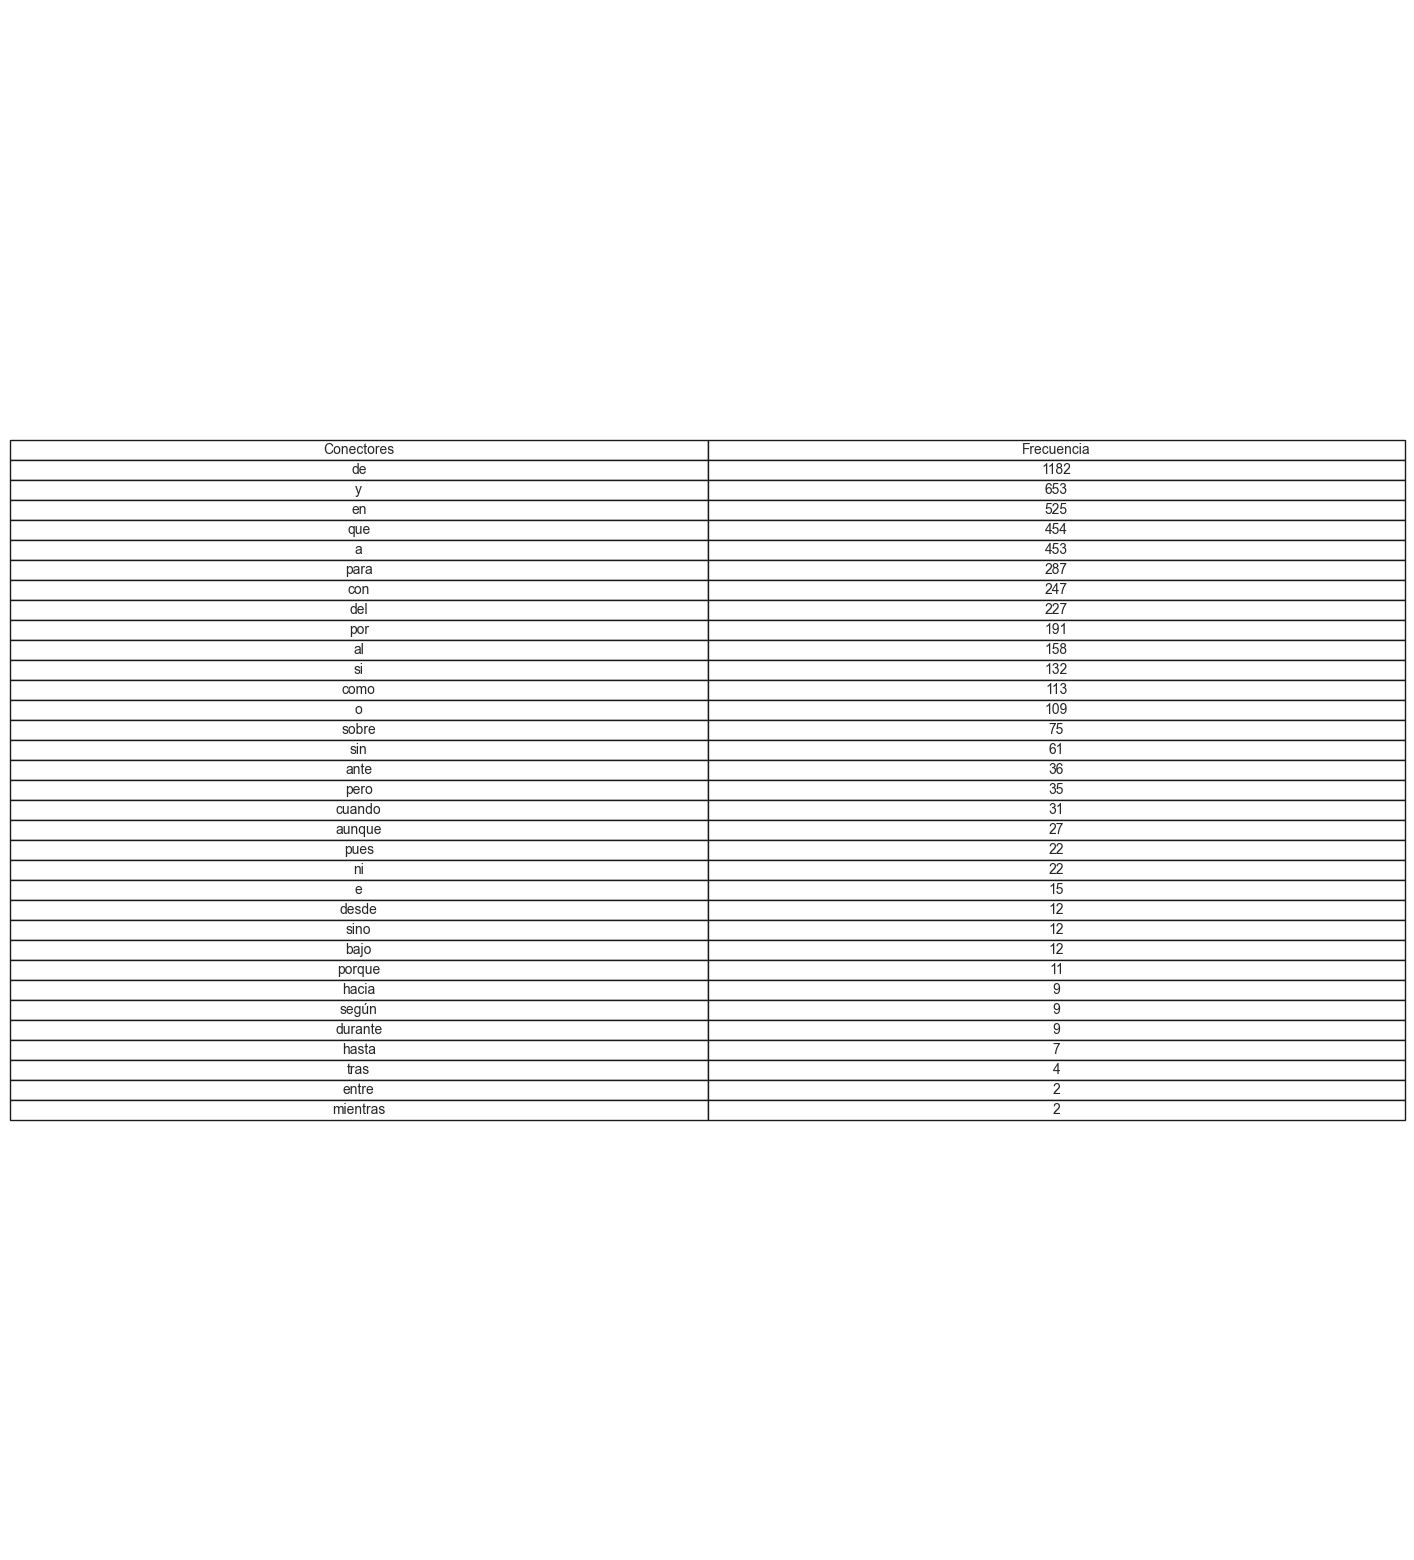

In [54]:
extract_grammar_connectors(df_caso, df_caso, caso)

## Justificaciones post conectores

### Código

In [57]:
import os
import pandas as pd
import spacy
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nlp = spacy.load("es_core_news_md")

def identificar_conectores_y_frases(texto):
    doc = nlp(texto)
    conectores_y_frases = []
    for token in doc:
        if token.pos_ in ["CCONJ", "SCONJ", "ADP"]:
            frase = ' '.join([t.text.lower() for t in doc[token.i + 1:token.i + 6]])  # Captura hasta 5 palabras después del conector
            conectores_y_frases.append((token.text, frase))
    return conectores_y_frases

def extract_keywords_after_connectors(df1, df2, caso):
    conectores_y_frases_totales = []

    # Extraer conectores y frases de las columnas de df1 para Diferencial 1
    for column in ['Respuesta']:
        conectores_y_frases_totales.extend(df1[column].apply(identificar_conectores_y_frases).tolist())

    # Extraer conectores y frases de las columnas de df2 para Diferencial 2
    #for column in ['Comentario - Ind1 - Diferencial 2', 'Comentario - Grup - Diferencial 2', 'Comentario - Ind2 - Diferencial 2']:
    #    conectores_y_frases_totales.extend(df2[column].apply(identificar_conectores_y_frases).tolist())

    # Aplanar la lista de listas
    conectores_y_frases_totales = [item for sublist in conectores_y_frases_totales for item in sublist]

    # Contar frecuencia de conectores
    conectores = [item[0] for item in conectores_y_frases_totales]
    frecuencia_conectores = Counter(conectores)
    conectores_mas_usados = [item[0] for item in frecuencia_conectores.most_common(10)]
    frases_relevantes = [frase for conector, frase in conectores_y_frases_totales if conector in conectores_mas_usados]

    # Calcular TF-IDF para identificar palabras clave en las frases relevantes
    custom_stopwords = list(cargar_stopwords('../dictionaries/stopwords_es.txt'))
    vectorizer = TfidfVectorizer(stop_words=custom_stopwords, max_features=30)  
    tfidf_matrix = vectorizer.fit_transform(frases_relevantes)

    # Obtener palabras clave
    palabras_clave = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    keywords = sorted(zip(palabras_clave, tfidf_scores), key=lambda x: x[1], reverse=True)

    # Convertir palabras clave en DataFrame
    df_keywords = pd.DataFrame(keywords, columns=['Palabra Clave', 'Importancia'])
    
    # Guardar el DataFrame como CSV
    os.makedirs(f"../resultados/{caso}", exist_ok=True)
    df_keywords.to_csv(f"../processed_data/{caso}/Palabras_Clave_Despues_Conectores.csv", index=False)

    # Crear un gráfico de tabla para las palabras y su importancia
    plt.figure(figsize=(10, 6))
    plt.axis('tight')
    plt.axis('off')
    tabla = plt.table(cellText=df_keywords.values,
                      colLabels=df_keywords.columns,
                      cellLoc='center',
                      loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(12)
    tabla.scale(1.2, 1.2)
    
    plt.title("Palabras post conectores", fontsize=14)
    plt.savefig(f"../resultados/{caso}/Conectores_Palabras_Clave.png", bbox_inches='tight')
    plt.close()

    print(f"Palabras clave después de conectores guardadas en ../resultados/{caso}/Palabras_Clave_Despues_Conectores.csv")
    return df_keywords

### Gráficos

In [58]:
extract_keywords_after_connectors(df_caso, df_caso, caso)

Palabras clave después de conectores guardadas en ../resultados/Luis/Palabras_Clave_Despues_Conectores.csv


,Palabra Clave,Importancia
0,proyecto,344.173124
1,empresa,216.662372
2,luis,153.829435
3,jefe,147.242434
4,debió,89.215905
5,seguridad,85.069717
6,software,81.704894
7,recursos,77.788466
8,pruebas,77.454281
9,ética,67.372283
